In [340]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from scipy.io import loadmat
import re

## Dataset_1

In [88]:
data = loadmat('ex6data1.mat')
X , y = data['X'] , data['y'].ravel() 

In [89]:
m = X.size
m

102

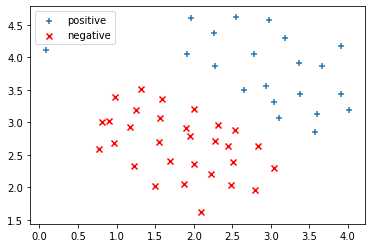

In [90]:
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', label='positive')
plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='x', label='negative', color='red')
plt.legend()

In [91]:
#SVM Classifier
clf = svm.SVC(kernel='linear')
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
clf.fit(X ,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [93]:
clf.support_vectors_

array([[1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [1.3191  , 3.5109  ],
       [2.5403  , 2.8867  ],
       [3.5772  , 2.856   ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.6555  , 3.5008  ],
       [3.0357  , 3.3165  ],
       [0.086405, 4.1045  ]])

In [94]:
vals = clf.predict(X)

In [95]:
vals

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [96]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [97]:
w  = clf.coef_.ravel()
w

array([1.40718563, 2.13398052])

In [98]:
b = clf.intercept_

In [99]:
yy = (-w[0]/w[1])*X[:,0] -b/w[1]

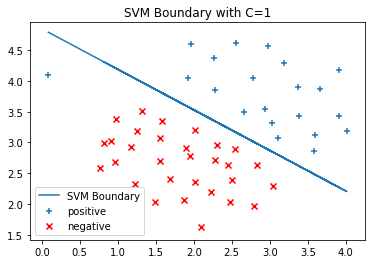

In [103]:
plt.plot(X[:,0], yy, label = 'SVM Boundary')
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', label='positive')
plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='x', label='negative', color='red')
plt.legend()
plt.title('SVM Boundary with C=1')
plt.savefig('SVM Boundary with C=1')

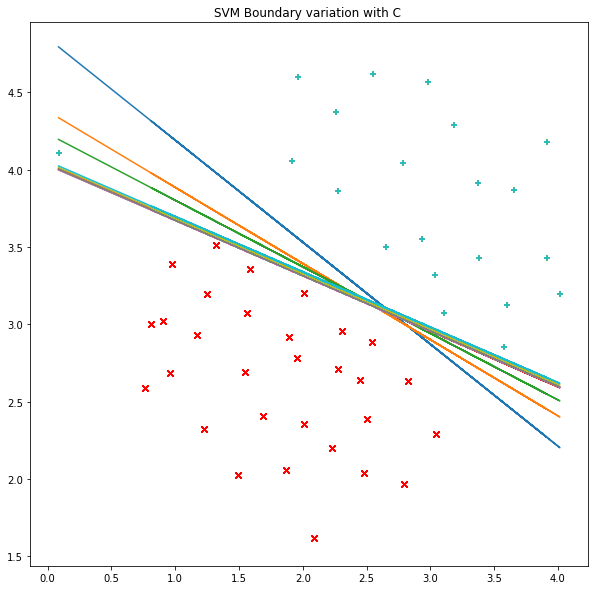

In [102]:
plt.figure(figsize=(10,10))
for c in range(1,101,10):
    clf100 = svm.SVC(kernel='linear', C =c)
    clf100.fit(X ,y)
    w100  = clf100.coef_.ravel()
    b100 = clf100.intercept_
    yy100 = (-w100[0]/w100[1])*X[:,0] -b100/w100[1]
    plt.plot(X[:,0], yy100, label = 'SVM Boundary')
    plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', label='positive')
    plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='x', label='negative', color='red')
    #plt.legend()
    plt.title('SVM Boundary variation with C ')
    plt.savefig('SVM Boundary variation with C ')
    #'SVM Boundary with C=' + str(c)

## Dataset_2

In [284]:
data2 = loadmat('ex6data2.mat')
X2, y2 = data2['X'] , data2['y'].ravel()
m = y2.size
m

863

In [285]:
np.unique(y2)

array([0, 1], dtype=uint8)

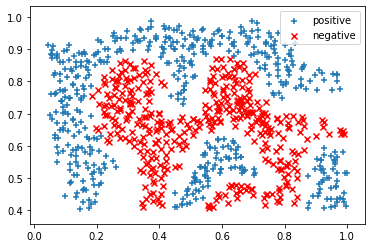

In [286]:
plt.scatter(X2[y2==1][:,0], X2[y2==1][:,1], marker='+', label='positive')
plt.scatter(X2[y2==0][:,0], X2[y2==0][:,1], marker='x', label='negative', color='red')
plt.legend()

#No linear Kernel possible

In [287]:
#Using Gaussian Kernel


In [296]:
def plot_contour(X2 ,y2,kernel='rbf', C=1, gamma =1):
    clf2 = svm.SVC(C=C, gamma = gamma, kernel=kernel)
    clf2.fit(X2,y2)
    x0_min , x0_max = X2[:,0].min()-0.2 , X2[:,0].max()+0.2
    x1_min , x1_max = X2[:,1].min()-0.2 , X2[:,1].max()+0.2
    h = -(x0_min - x0_max)/1000
    xx, yy = np.meshgrid(np.arange(x0_min , x0_max, h), np.arange(x1_min , x1_max , h))
    Z = clf2.predict(np.c_[xx.ravel() , yy.ravel()])
    plt.contourf(xx , yy , Z.reshape(xx.shape), cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X2[y2==1][:,0], X2[y2==1][:,1], marker='+', label='positive')
    plt.scatter(X2[y2==0][:,0], X2[y2==0][:,1], marker='x', label='negative', color='red')
    plt.legend()
    plt.title('Contour_plot with C=' +str(C) + ' and gamma=' + str(gamma))
    plt.savefig('Contour_plot with C=' +str(C)+ ' and gamma=' + str(gamma))

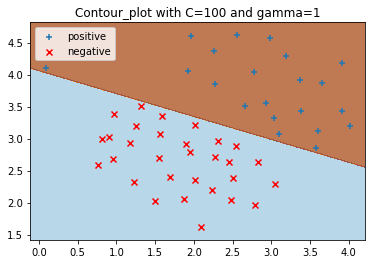

In [297]:
plot_contour(X ,y, 'linear', 100)

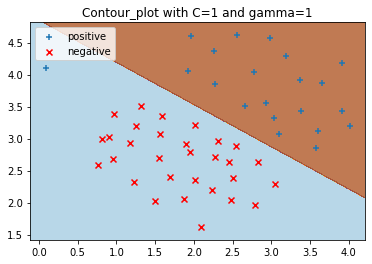

In [298]:
plot_contour(X ,y, 'linear', 1)


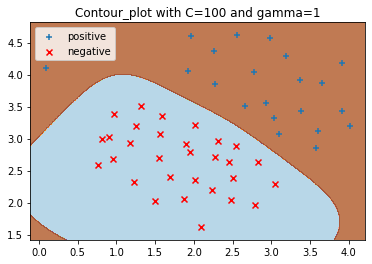

In [300]:
plot_contour(X ,y, C=100)

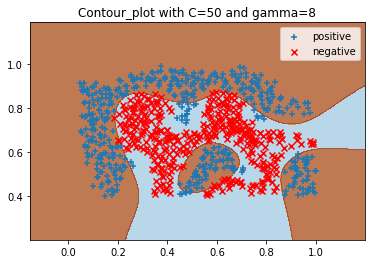

In [302]:
plot_contour(X2 ,y2 ,'rbf', 50,8)

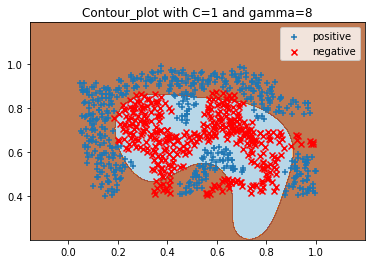

In [303]:
plot_contour(X2 ,y2 ,'rbf', 1,8)

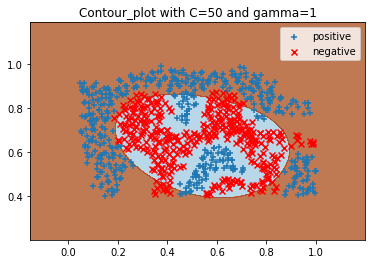

In [304]:
plot_contour(X2 ,y2 ,'rbf', 50,1)

In [274]:
data3 = loadmat('ex6data3.mat')
X3, y3 = data3['X'] , data3['y'].ravel()
m = y3.size


/home/abhishek/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

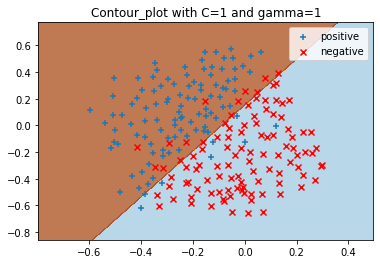

In [305]:
plot_contour(X3 ,y3 ,'linear')

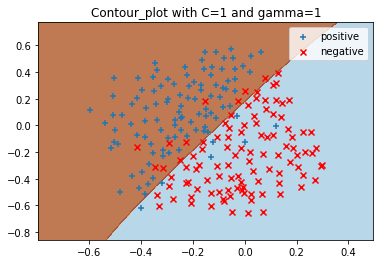

In [308]:
plot_contour(X3 ,y3 ,'rbf')

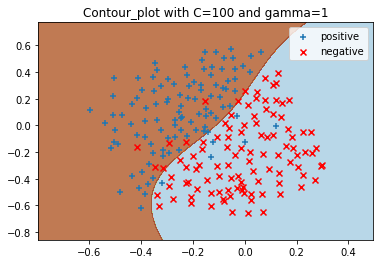

In [307]:
plot_contour(X3 ,y3 ,'rbf', C = 100)

#                                 SPAM CLASSIFIER 

In [377]:
vocabList = np.genfromtxt('vocab.txt' , dtype=str)
vocabList = list(vocabList[:,1].astype('str'))
vocabList

['aa',
 'ab',
 'abil',
 'abl',
 'about',
 'abov',
 'absolut',
 'abus',
 'ac',
 'accept',
 'access',
 'accord',
 'account',
 'achiev',
 'acquir',
 'across',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'adam',
 'add',
 'addit',
 'address',
 'administr',
 'adult',
 'advanc',
 'advantag',
 'advertis',
 'advic',
 'advis',
 'ae',
 'af',
 'affect',
 'affili',
 'afford',
 'africa',
 'after',
 'ag',
 'again',
 'against',
 'agenc',
 'agent',
 'ago',
 'agre',
 'agreement',
 'aid',
 'air',
 'al',
 'alb',
 'align',
 'all',
 'allow',
 'almost',
 'alon',
 'along',
 'alreadi',
 'alsa',
 'also',
 'altern',
 'although',
 'alwai',
 'am',
 'amaz',
 'america',
 'american',
 'among',
 'amount',
 'amp',
 'an',
 'analysi',
 'analyst',
 'and',
 'ani',
 'anim',
 'announc',
 'annual',
 'annuiti',
 'anoth',
 'answer',
 'anti',
 'anumb',
 'anybodi',
 'anymor',
 'anyon',
 'anyth',
 'anywai',
 'anywher',
 'aol',
 'ap',
 'apolog',
 'app',
 'appar',
 'appear',
 'appl',
 'appli',
 'applic',
 'appreci',
 'approach',

In [378]:
class PorterStemmer:
    """
    Porter Stemming Algorithm
    This is the Porter stemming algorithm, ported to Python from the
    version coded up in ANSI C by the author. It may be be regarded
    as canonical, in that it follows the algorithm presented in
    Porter, 1980, An algorithm for suffix stripping, Program, Vol. 14,
    no. 3, pp 130-137,
    only differing from it at the points maked --DEPARTURE-- below.
    See also http://www.tartarus.org/~martin/PorterStemmer
    The algorithm as described in the paper could be exactly replicated
    by adjusting the points of DEPARTURE, but this is barely necessary,
    because (a) the points of DEPARTURE are definitely improvements, and
    (b) no encoding of the Porter stemmer I have seen is anything like
    as exact as this version, even with the points of DEPARTURE!
    Vivake Gupta (v@nano.com)
    Release 1: January 2001
    Further adjustments by Santiago Bruno (bananabruno@gmail.com)
    to allow word input not restricted to one word per line, leading
    to:
    release 2: July 2008
    """
    def __init__(self):
        """
        The main part of the stemming algorithm starts here.
        b is a buffer holding a word to be stemmed. The letters are in b[k0],
        b[k0+1] ... ending at b[k]. In fact k0 = 0 in this demo program. k is
        readjusted downwards as the stemming progresses. Zero termination is
        not in fact used in the algorithm.
        Note that only lower case sequences are stemmed. Forcing to lower case
        should be done before stem(...) is called.
        """
        self.b = ""  # buffer for word to be stemmed
        self.k = 0
        self.k0 = 0
        self.j = 0   # j is a general offset into the string

    def cons(self, i):
        """cons(i) is TRUE <=> b[i] is a consonant."""
        if self.b[i] in 'aeiou':
            return 0
        if self.b[i] == 'y':
            if i == self.k0:
                return 1
            else:
                return not self.cons(i - 1)
        return 1

    def m(self):
        """
        m() measures the number of consonant sequences between k0 and j.
        if c is a consonant sequence and v a vowel sequence, and <..>
        indicates arbitrary presence,
           <c><v>       gives 0
           <c>vc<v>     gives 1
           <c>vcvc<v>   gives 2
           <c>vcvcvc<v> gives 3
           ....
        """
        n = 0
        i = self.k0
        while 1:
            if i > self.j:
                return n
            if not self.cons(i):
                break
            i = i + 1
        i = i + 1
        while 1:
            while 1:
                if i > self.j:
                    return n
                if self.cons(i):
                    break
                i = i + 1
            i = i + 1
            n = n + 1
            while 1:
                if i > self.j:
                    return n
                if not self.cons(i):
                    break
                i = i + 1
            i = i + 1

    def vowelinstem(self):
        """vowelinstem() is TRUE <=> k0,...j contains a vowel"""
        for i in range(self.k0, self.j + 1):
            if not self.cons(i):
                return 1
        return 0

    def doublec(self, j):
        """ doublec(j) is TRUE <=> j,(j-1) contain a double consonant. """
        if j < (self.k0 + 1):
            return 0
        if self.b[j] != self.b[j-1]:
            return 0
        return self.cons(j)

    def cvc(self, i):
        """
        cvc(i) is TRUE <=> i-2,i-1,i has the form consonant - vowel - consonant
        and also if the second c is not w,x or y. this is used when trying to
        restore an e at the end of a short  e.g.
           cav(e), lov(e), hop(e), crim(e), but
           snow, box, tray.
        """
        if i < (self.k0 + 2) or not self.cons(i) or self.cons(i-1) or not self.cons(i-2):
            return 0
        ch = self.b[i]
        if ch in 'wxy':
            return 0
        return 1

    def ends(self, s):
        """ends(s) is TRUE <=> k0,...k ends with the string s."""
        length = len(s)
        if s[length - 1] != self.b[self.k]: # tiny speed-up
            return 0
        if length > (self.k - self.k0 + 1):
            return 0
        if self.b[self.k-length+1:self.k+1] != s:
            return 0
        self.j = self.k - length
        return 1

    def setto(self, s):
        """setto(s) sets (j+1),...k to the characters in the string s, readjusting k."""
        length = len(s)
        self.b = self.b[:self.j+1] + s + self.b[self.j+length+1:]
        self.k = self.j + length

    def r(self, s):
        """r(s) is used further down."""
        if self.m() > 0:
            self.setto(s)

    def step1ab(self):
        """step1ab() gets rid of plurals and -ed or -ing. e.g.
           caresses  ->  caress
           ponies    ->  poni
           ties      ->  ti
           caress    ->  caress
           cats      ->  cat
           feed      ->  feed
           agreed    ->  agree
           disabled  ->  disable
           matting   ->  mat
           mating    ->  mate
           meeting   ->  meet
           milling   ->  mill
           messing   ->  mess
           meetings  ->  meet
        """
        if self.b[self.k] == 's':
            if self.ends("sses"):
                self.k = self.k - 2
            elif self.ends("ies"):
                self.setto("i")
            elif self.b[self.k - 1] != 's':
                self.k = self.k - 1
        if self.ends("eed"):
            if self.m() > 0:
                self.k = self.k - 1
        elif (self.ends("ed") or self.ends("ing")) and self.vowelinstem():
            self.k = self.j
            if self.ends("at"):
                self.setto("ate")
            elif self.ends("bl"):
                self.setto("ble")
            elif self.ends("iz"):
                self.setto("ize")
            elif self.doublec(self.k):
                self.k = self.k - 1
                ch = self.b[self.k]
                if ch in 'lsz':
                    self.k += 1
            elif self.m() == 1 and self.cvc(self.k):
                self.setto("e")

    def step1c(self):
        """step1c() turns terminal y to i when there is another vowel in the stem."""
        if self.ends("y") and self.vowelinstem():
            self.b = self.b[:self.k] + 'i' + self.b[self.k+1:]

    def step2(self):
        """step2() maps double suffices to single ones.
        so -ization ( = -ize plus -ation) maps to -ize etc. note that the
        string before the suffix must give m() > 0.
        """
        if self.b[self.k - 1] == 'a':
            if self.ends("ational"):   self.r("ate")
            elif self.ends("tional"):  self.r("tion")
        elif self.b[self.k - 1] == 'c':
            if self.ends("enci"):      self.r("ence")
            elif self.ends("anci"):    self.r("ance")
        elif self.b[self.k - 1] == 'e':
            if self.ends("izer"):      self.r("ize")
        elif self.b[self.k - 1] == 'l':
            if self.ends("bli"):       self.r("ble") # --DEPARTURE--
            # To match the published algorithm, replace this phrase with
            #   if self.ends("abli"):      self.r("able")
            elif self.ends("alli"):    self.r("al")
            elif self.ends("entli"):   self.r("ent")
            elif self.ends("eli"):     self.r("e")
            elif self.ends("ousli"):   self.r("ous")
        elif self.b[self.k - 1] == 'o':
            if self.ends("ization"):   self.r("ize")
            elif self.ends("ation"):   self.r("ate")
            elif self.ends("ator"):    self.r("ate")
        elif self.b[self.k - 1] == 's':
            if self.ends("alism"):     self.r("al")
            elif self.ends("iveness"): self.r("ive")
            elif self.ends("fulness"): self.r("ful")
            elif self.ends("ousness"): self.r("ous")
        elif self.b[self.k - 1] == 't':
            if self.ends("aliti"):     self.r("al")
            elif self.ends("iviti"):   self.r("ive")
            elif self.ends("biliti"):  self.r("ble")
        elif self.b[self.k - 1] == 'g': # --DEPARTURE--
            if self.ends("logi"):      self.r("log")
        # To match the published algorithm, delete this phrase

    def step3(self):
        """step3() dels with -ic-, -full, -ness etc. similar strategy to step2."""
        if self.b[self.k] == 'e':
            if self.ends("icate"):     self.r("ic")
            elif self.ends("ative"):   self.r("")
            elif self.ends("alize"):   self.r("al")
        elif self.b[self.k] == 'i':
            if self.ends("iciti"):     self.r("ic")
        elif self.b[self.k] == 'l':
            if self.ends("ical"):      self.r("ic")
            elif self.ends("ful"):     self.r("")
        elif self.b[self.k] == 's':
            if self.ends("ness"):      self.r("")

    def step4(self):
        """step4() takes off -ant, -ence etc., in context <c>vcvc<v>."""
        if self.b[self.k - 1] == 'a':
            if self.ends("al"): pass
            else: return
        elif self.b[self.k - 1] == 'c':
            if self.ends("ance"): pass
            elif self.ends("ence"): pass
            else: return
        elif self.b[self.k - 1] == 'e':
            if self.ends("er"): pass
            else: return
        elif self.b[self.k - 1] == 'i':
            if self.ends("ic"): pass
            else: return
        elif self.b[self.k - 1] == 'l':
            if self.ends("able"): pass
            elif self.ends("ible"): pass
            else: return
        elif self.b[self.k - 1] == 'n':
            if self.ends("ant"): pass
            elif self.ends("ement"): pass
            elif self.ends("ment"): pass
            elif self.ends("ent"): pass
            else: return
        elif self.b[self.k - 1] == 'o':
            if self.ends("ion") and (self.b[self.j] == 's' or self.b[self.j] == 't'): pass
            elif self.ends("ou"): pass
            # takes care of -ous
            else: return
        elif self.b[self.k - 1] == 's':
            if self.ends("ism"): pass
            else: return
        elif self.b[self.k - 1] == 't':
            if self.ends("ate"): pass
            elif self.ends("iti"): pass
            else: return
        elif self.b[self.k - 1] == 'u':
            if self.ends("ous"): pass
            else: return
        elif self.b[self.k - 1] == 'v':
            if self.ends("ive"): pass
            else: return
        elif self.b[self.k - 1] == 'z':
            if self.ends("ize"): pass
            else: return
        else:
            return
        if self.m() > 1:
            self.k = self.j

    def step5(self):
        """step5() removes a final -e if m() > 1, and changes -ll to -l if
        m() > 1.
        """
        self.j = self.k
        if self.b[self.k] == 'e':
            a = self.m()
            if a > 1 or (a == 1 and not self.cvc(self.k-1)):
                self.k = self.k - 1
        if self.b[self.k] == 'l' and self.doublec(self.k) and self.m() > 1:
            self.k = self.k -1

    def stem(self, p, i=0, j=None):
        """In stem(p,i,j), p is a char pointer, and the string to be stemmed
        is from p[i] to p[j] inclusive. Typically i is zero and j is the
        offset to the last character of a string, (p[j+1] == '\0'). The
        stemmer adjusts the characters p[i] ... p[j] and returns the new
        end-point of the string, k. Stemming never increases word length, so
        i <= k <= j. To turn the stemmer into a module, declare 'stem' as
        extern, and delete the remainder of this file.
        """
        # copy the parameters into statics
        self.b = p
        self.k = j or len(p) - 1
        self.k0 = i
        if self.k <= self.k0 + 1:
            return self.b  # --DEPARTURE--

        # With this line, strings of length 1 or 2 don't go through the
        # stemming process, although no mention is made of this in the
        # published algorithm. Remove the line to match the published
        # algorithm.

        self.step1ab()
        self.step1c()
        self.step2()
        self.step3()
        self.step4()
        self.step5()
        return self.b[self.k0:self.k+1]

In [379]:
def processEmail(email_contents , verbose = True):
    word_indices = []
    
    # Find the Headers ( \n\n and remove )
    hdrstart = email_contents.find(chr(10) + chr(10))
    email_contents = email_contents[hdrstart:]
    
    #Lower_case
    email_contents = email_contents.lower()
    
    #remove HTML tags
    # Looks for any expression that starts with < and ends with >nd does not have any < or > in the tag it with a space,then replace
    email_contents = re.compile(r'<[^<>]+>').sub(' ', email_contents)
    
    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.compile(r'[0-9]+').sub(' number ', email_contents)
    
    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.compile(r'(http|https)://[^\s]*').sub(' httpaddr ', email_contents)
    
    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    
    # Handle $ sign
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    
    # get rid of any punctuation
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)
    
     # remove any empty word string
    email_contents = [word for word in email_contents if len(word) > 0]
    
     # Stem the email contents word by word
    stemmer = PorterStemmer()
    processed_email = []
    for word in email_contents:
        # Remove any remaining non alphanumeric characters in word
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)

        if len(word) < 1:
            continue

        # Look up the word in the dictionary and add to word_indices if found
        try:
            word_indices.append(vocabList.index(word))
        except ValueError:
            pass
        
    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    return word_indices

In [391]:
#Extracting features from email
def extract_feature(word_indicies):
    feature = np.zeros(len(vocabList))
    for indices in word_indicies:
            feature[indices] = 1
    return feature        

In [392]:
with open('emailSample1.txt', 'r') as file:
    file_contents = file.read() 

In [393]:
word_contents = processEmail(file_contents)
word_contents

----------------
Processed email:
----------------
to unsubscrib yourself from thi mail list send an email to emailaddr


[1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]

In [435]:
extracted_feature = extract_feature(word_contents)
extracted_feature

array([0., 0., 0., ..., 0., 0., 0.])

In [436]:
spamData = loadmat('spamTrain.mat')
spamData_X, spamData_y = spamData['X'] , spamData['y']


In [437]:
spam_clf =  svm.SVC(C=0.1, kernel='linear')
spam_clf.fit(spamData_X,spamData_y)

/home/abhishek/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [438]:
train_predicted = spam_clf.predict(spamData_X)

In [439]:
train_predicted.size
#spamData_y.size

4000

In [440]:
def accuracy(predicted, y):
    return (predicted==y).mean()
    

In [441]:
accuracy(train_predicted, spamData_y.ravel())

0.99825

In [443]:
spamTest = loadmat('spamTest.mat')
spamTest_X ,spamTest_y = spamTest['Xtest'], spamTest['ytest']
test_predicted = spam_clf.predict(spamTest_X)

In [445]:
accuracy(test_predicted, spamTest_y.ravel())

0.989

In [479]:
#Top Predictions of Spam
top_words_weights = list(np.sort(spam_clf.coef_)[0,-15:])
top_words_indices = []
for weight in top_words_weights:
    top_words_indices.append(list(spam_clf.coef_[0,:]).index(weight))

most_predicted_words = [vocabList[i] for i in top_words_indices]
most_predicted_words

['hour',
 'ga',
 'lo',
 'nbsp',
 'most',
 'pleas',
 'price',
 'will',
 'dollar',
 'basenumb',
 'visit',
 'guarante',
 'remov',
 'click',
 'our']